In [1]:
p_exact = cbrt(25)
a = 2;
b = 3;
TOL = 10^-8;

@show n_max= ceil(Int, log2((b-a)/TOL));

n_max = ceil(Int, log2((b - a) / TOL)) = 27


In [2]:
f(x) = x^3 - 25
p = 0;
for i in 1:n_max
    p = 0.5 *  (a+b);
    if ( f(a) * f(p)<=0)
        b = p;
    else
        a = p
    end
    println("$i: |p - p_exact| = $(round(abs(p - p_exact),digits=12))")
end

1: |p - p_exact| = 0.424017738213
2: |p - p_exact| = 0.174017738213
3: |p - p_exact| = 0.049017738213
4: |p - p_exact| = 0.013482261787
5: |p - p_exact| = 0.017767738213
6: |p - p_exact| = 0.002142738213
7: |p - p_exact| = 0.005669761787
8: |p - p_exact| = 0.001763511787
9: |p - p_exact| = 0.000189613213
10: |p - p_exact| = 0.000786949287
11: |p - p_exact| = 0.000298668037
12: |p - p_exact| = 5.4527412e-5
13: |p - p_exact| = 6.75429e-5
14: |p - p_exact| = 6.507744e-6
15: |p - p_exact| = 2.4009834e-5
16: |p - p_exact| = 8.751045e-6
17: |p - p_exact| = 1.12165e-6
18: |p - p_exact| = 2.693047e-6
19: |p - p_exact| = 7.85698e-7
20: |p - p_exact| = 1.67976e-7
21: |p - p_exact| = 3.08861e-7
22: |p - p_exact| = 7.0442e-8
23: |p - p_exact| = 4.8767e-8
24: |p - p_exact| = 1.0838e-8
25: |p - p_exact| = 1.8964e-8
26: |p - p_exact| = 4.063e-9
27: |p - p_exact| = 3.387e-9


#### I estimated that we would need 27 iterations to get a tolerance of 10^-8, but it only took about 22 iterations as shown above.

In [3]:
function newton(f, df, p0, n_max, rel_tol; verbose = true)
    
    converged = false;
    p = p0;
    p_old = p0;

    for i in 1:n_max

        p = p_old - f(p_old)/df(p_old);
        
        if verbose
            println(" $i: p = $(p), |f(p)| = $(abs(f(p)))")
        end

        if (i>1)
            if abs(p-p_old)/abs(p)< rel_tol
                converged = true;
                break
            end
        end

        p_old = p;

    end
    
    if !converged
        println("ERROR: Did not converge after $n_max iterations")
    end

    return p
    
end

newton (generic function with 1 method)

In [4]:
import Pkg; Pkg.add("ForwardDiff")

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.11/Project.toml`
  No Changes to `~/.julia/environments/v1.11/Manifest.toml`


In [5]:

using ForwardDiff

f2 = x-> x^3 - 25;
df_auto = x-> ForwardDiff.derivative(f2,x)
p0 = 3;
rel_tol = 10^-8;
n_max = 100;

p = newton(f2, df_auto, p0, n_max, rel_tol);

 1: p = 2.925925925925926, |f(p)| = 0.04897627394198523
 2: p = 2.924018982396379, |f(p)| = 3.1912871790495956e-5
 3: p = 2.9240177382133954, |f(p)| = 1.3578471680375515e-11
 4: p = 2.924017738212866, |f(p)| = 3.552713678800501e-15


#### It takes 3 iterations to get to the toleranc eof 10^-8

In [6]:
# False Position Method in Julia
function false_position(f, a, b, tol=1e-8, max_iter=100)
    fa = f(a)
    fb = f(b)
    if fa * fb > 0
        error("Function must have opposite signs at endpoints a and b.")
    end

    iter = 0
    c_old = a
    while iter < max_iter
        # Compute the false position
        c = b - fb*(b - a)/(fb - fa)
        fc = f(c)
        # Compute the absolute error
        err = abs(c - c_old)
        println("Iteration $iter: c = $c, error = $err")
        if err < tol
            return c
        end
        # Update interval
        if fa * fc < 0
            b = c
            fb = fc
        else
            a = c
            fa = fc
        end
        c_old = c
        iter += 1
    end
    println("Maximum iterations reached.")
    return c
end

# Define the function f(x) = x^3 - 25
f(x) = x^3 - 25

# Apply false position method on interval [2,3] with tolerance 1e-8
root = false_position(f, 2, 3, 1e-8)
println("Estimated root: $root")
println("Julia cubic root for comparison: ", cbrt(25))


Iteration 0: c = 2.8947368421052633, error = 0.8947368421052633
Iteration 1: c = 2.92326495908173, error = 0.028528116976466844
Iteration 2: c = 2.923998508100832, error = 0.0007335490191020533
Iteration 3: c = 2.9240172470506254, error = 1.8738949793206672e-5
Iteration 4: c = 2.924017725667992, error = 4.786173666282423e-7
Iteration 5: c = 2.924017737892455, error = 1.2224462775378697e-8
Iteration 6: c = 2.9240177382046824, error = 3.122275771261229e-10
Estimated root: 2.9240177382046824
Julia cubic root for comparison: 2.924017738212866


Some q's:
How does the significant digits change throughout each iteration for these methods?

Bisection: The number of significant digits changes relatively slow ocmpared to Newton's and the Method of False Position.

Newton's: The number of significant digits changes very quickly in this method.

Method of False Position: The number of significant digits changes quickly, but not as quick as Newton's method.



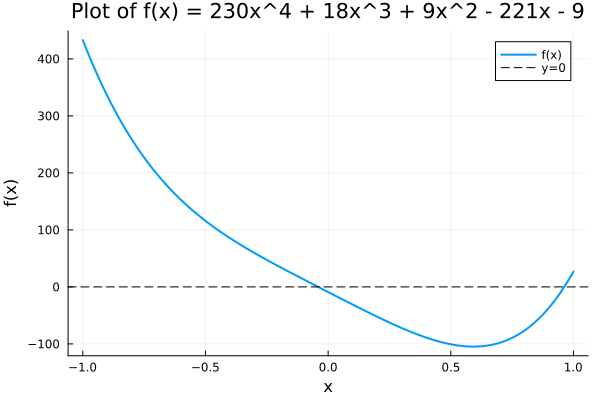

In [7]:
using Plots

# Define the polynomial
f(x) = 230x^4 + 18x^3 + 9x^2 - 221x - 9

# Create x values in the interval [-1, 1]
x = LinRange(-1, 1, 500)

# Plot the function with grid
plot(x, f.(x), label="f(x)", lw=2, grid=true)
hline!([0], color=:black, linestyle=:dash, label="y=0") # x-axis
xlabel!("x")
ylabel!("f(x)")
title!("Plot of f(x) = 230x^4 + 18x^3 + 9x^2 - 221x - 9")


In [8]:
using ForwardDiff

f3 = x-> 230x^4 + 18x^3 + 9x^2 - 221x - 9
df_auto = x-> ForwardDiff.derivative(f3,x)
p0 = -.5;
rel_tol = 10^-6;
n_max = 100;

println("Using p0 = -.5")
p = newton(f3, df_auto, p0, n_max, rel_tol);
println("Using p0 = 1")
p2 = newton(f3, df_auto, 1, n_max, rel_tol);

Using p0 = -.5
 1: p = -0.15045248868778283, |f(p)| = 24.510270975839106
 2: p = -0.04181681394887035, |f(p)| = 0.25664077102784333
 3: p = -0.04065934349732934, |f(p)| = 1.2233998946342695e-5
 4: p = -0.04065928831575899, |f(p)| = 2.842170943040401e-14
 5: p = -0.040659288315758865, |f(p)| = 1.7763568394002505e-15
Using p0 = 1
 1: p = 0.9649805447470817, |f(p)| = 1.729702780624109
 2: p = 0.96241172497926, |f(p)| = 0.008867662019611089
 3: p = 0.9623984191063186, |f(p)| = 2.3709401375526795e-7
 4: p = 0.9623984187505414, |f(p)| = 0.0


In [9]:
function secant(f, p0, p1, n_max, rel_tol; verbose = true)
    
    converged = false;
    
    p = p0;
    for i in 1:n_max

        p = p1 - f(p1) * (p1-p0)/(f(p1)-f(p0));
        
        if verbose
            println(" $i: p = $(p), |f(p)| = $(abs(f(p)))")
        end

        
        if (i>1)
            if abs(p-p1)/abs(p1)< rel_tol
                converged = true;
                break
            end
        end
        p0 = p1;
        p1 = p;

    end
    
    if !converged
        println("ERROR: Did not converge after $n_max iterations")
    end

    return p
    
end

secant (generic function with 1 method)

In [10]:
fs = x-> 230x^4 + 18x^3 + 9x^2 - 221x - 9
p0 = 1;
p1 = 2;
rel_tol = 10^-6;
n_max = 100;

println("Secant with p0 = 1, p1 = 2")
p = secant(fs, p0, p1, n_max, rel_tol);
println("Secant with p0 = -1, p1 = 0")
p = secant(fs, -1, 0, n_max, rel_tol);

Secant with p0 = 1, p1 = 2
 1: p = 0.9920165582495564, |f(p)| = 20.936260163388766
 2: p = 0.9857878077898933, |f(p)| = 16.331182887439496
 3: p = 0.963698523110949, |f(p)| = 0.8686700984517302
 4: p = 0.9624575669120022, |f(p)| = 0.039421704957533166
 5: p = 0.9623985729971223, |f(p)| = 0.0001027917396072553
 6: p = 0.9623984187688733, |f(p)| = 1.2216560207889415e-8
Secant with p0 = -1, p1 = 0
 1: p = -0.020361990950226245, |f(p)| = 4.496380927836867
 2: p = -0.04069125643524189, |f(p)| = 0.007087483162253605
 3: p = -0.04065926257769109, |f(p)| = 5.706243772607422e-6
 4: p = -0.040659288315725135, |f(p)| = 7.478462293875054e-12


In [11]:
function muller(f, p0, p1, p2, n_max, rel_tol; verbose = true)
    
    converged = false;
    p = p2;

    for i in 1:n_max

        # solve for the constants a, b, and c
        c = f(p2);
        A = [(p0-p2)^2 p0-p2; (p1-p2)^2 p1-p2 ]; # builds matrix
        x = A\[f(p0)-c; f(p1)-c]; # solves for a and b
        a = x[1];
        b = x[2];
        
        # take the root with larger denominator
        if abs(b + sqrt(b^2-4*a*c))> abs(b - sqrt(b^2-4*a*c))
            p = p2 - 2*c/(b + sqrt(b^2-4*a*c));
        else
            p = p2 - 2*c/(b - sqrt(b^2-4*a*c));            
        end
        
        if verbose
            println(" $i: p = $(p), |f(p)| = $(abs(f(p)))")
        end
        
        if (i>1)
            if abs(p-p2)/abs(p)< rel_tol
                converged = true;
                break
            end
        end

        # update entries
        p0 = p1;
        p1 = p2;
        p2 = p;

    end
    
    if !converged
        println("ERROR: Did not converge after $n_max iterations")
    end

    return p
    
end

muller (generic function with 1 method)

In [12]:
fm = x -> 230x^4 + 18x^3 + 9x^2 - 221x - 9

p0 = .1
p1 = 0
p2 = -.1

rel_tol = 1e-8;
n_max = 100;

println("Root 1")
p = muller(fm, p0, p1, p2, n_max, rel_tol);


p0 = .9;
p1 = 1;
p2 = 1.5;
println("Root 2")
p = muller(fm, p0, p1, p2, n_max, rel_tol);

p0 = -0.5 + 0.7im
p1 = -0.4 + 0.9im
p2 = -0.6 + 0.7im
println("Root 3")
root3 = muller(fm, p0, p1, p2, n_max, rel_tol)

p0 = -0.5 - 0.7im
p1 = -0.4 - 0.9im
p2 = -0.6 - 0.7im
println("Root 4")
root4 = muller(fm, p0, p1, p2, n_max, rel_tol)


Root 1
 1: p = -0.04067252480167875, |f(p)| = 0.0029345892276104735
 2: p = -0.040659291729754236, |f(p)| = 7.568979167871248e-7
 3: p = -0.04065928831575846, |f(p)| = 8.881784197001252e-14
 4: p = -0.040659288315758865, |f(p)| = 1.7763568394002505e-15
Root 2
 1: p = 0.9642773856382074, |f(p)| = 1.2568991467529997
 2: p = 0.9623373306770385, |f(p)| = 0.04070480249765751
 3: p = 0.9623985140342571, |f(p)| = 6.349818372086702e-5
 4: p = 0.9623984187505563, |f(p)| = 9.890754881780595e-12
 5: p = 0.9623984187505414, |f(p)| = 0.0
Root 3
 1: p = -0.501606221228808 + 0.8702429967396976im, |f(p)| = 3.022774713574323
 2: p = -0.4999157176229 + 0.865931131364747im, |f(p)| = 0.08391112314274383
 3: p = -0.5000000607425462 + 0.8660252684154589im, |f(p)| = 9.847969347494732e-5
 4: p = -0.5000000000000394 + 0.8660254037843291im, |f(p)| = 7.727226702843673e-11
 5: p = -0.5 + 0.8660254037844387im, |f(p)| = 2.842170943040401e-14
Root 4
 1: p = -0.501606221228808 - 0.8702429967396976im, |f(p)| = 3.02277

-0.5 - 0.8660254037844387im

In [13]:
function fixed_point_iteration(g, p, n_max, rel_tol; verbose=true)
    p_old = p;
    for i in 1:n_max
        p = g(p);
        println("$i: p = $p");
        if(i>1)
            if abs(p_old-p)/abs(p) < rel_tol
                break;
            end
        end
        p_old = p;
    end

    return p
    
end

fixed_point_iteration (generic function with 1 method)

In [14]:

fa = p -> p * (1 + (7 - p^5) / (p^2))
fb = p -> p - ((p^5 - 7) / (p^2))
fc = p -> p - ((p^5 - 7) / (5*(p^4)))
fd = p -> p-((p^5-7)/12)
a = fixed_point_iteration(fa, 1, 10, 10^-3)
b = fixed_point_iteration(fb, 1, 10, 10^-3)
c = fixed_point_iteration(fc, 1, 10, 10^-3)
d = fixed_point_iteration(fd, 1, 10, 10^-3)


1: p = 7.0
2: p = -2393.0
3: p = -3.2792218151994004e13
4: p = -1.1563336869723849e54
5: p = -1.7878567222838166e216
6: p = NaN
7: p = NaN
8: p = NaN
9: p = NaN
10: p = NaN
1: p = 7.0
2: p = -335.85714285714283
3: p = 3.788435671143231e7
4: p = -5.437255629158596e22
5: p = 1.6074565945577786e68
6: p = -Inf
7: p = NaN
8: p = NaN
9: p = NaN
10: p = NaN
1: p = 2.2
2: p = 1.8197636773444439
3: p = 1.5834748298961614
4: p = 1.4894609741454279
5: p = 1.476022436131861
6: p = 1.4757732457766082
1: p = 1.5
2: p = 1.4505208333333333
3: p = 1.4987496607981934
4: p = 1.4519035351323155
5: p = 1.4975770669956296
6: p = 1.453192290208959
7: p = 1.4964753637027308
8: p = 1.4543961188702597
9: p = 1.4954385872694191
10: p = 1.4555228100193345


1.4555228100193345

Ranking from speed of convergence with p_0 = 1, it would be C, D, B, A 